<div >
<img src = "figs/bannerMLMkting.png" />
</div>

# Ejemplo generado a través de chat gpt de segmentación de clientes:


## Solicitud hecha a chatgpt:


With the case I will going to give you, would you help me to build a random sample that allows you to recreate an example of this case and the process to build a segmentation in python? 


#### Segmentación y Targeting
#### Caso: ESSEC Business School

At the time of this writing, ESSEC Business School is ranked #6 among European Business Schools (Financial Times). While one of its flagship programs is its Master In Management (#6 worldwide, FT ranking), the school has a significant executive education activity, mostly located on its La Défense campus (right on the outskirt of Paris).
Executive Education is typically split into two categories: customized programs and open-enrollment programs. ESSEC is ranked #3 worldwide for customized programs (i.e., programs designed specifically for a company and its employees) and #16 for open-enrollment programs (i.e., general programs targeting a wide audience of business executives).

Among the open-enrollment programs, one of the degrees delivered by ESSEC Business School is its Executive MBA. EMBA students are fairly senior in their fields and possess considerable work experience. Participants in an EMBA program typically hope to hone their leadership skills, accelerate their careers or change professional orientation.

The Management of ESSEC Business School Executive Education (EEE) wishes to improve the experience (and ranking) of the program and customize its content to the varying needs of the audience. To that avail, the program would offer several modules throughout the year in smaller groups, and interested participants would sign into the module(s) of their choice.


Of course, the design of customized modules requires a better understanding of why participants decided to join the ESSEC Executive MBA in the first place: their needs, desires, frustrations, and motivations. Management decided to survey current and past participants and ask them about their motivations for joining the program.


##### Segmentation questions (bases)

Respondents were asked to rate on a 1-5 scale whether the following factors were important in their choices to join the ESSEC Executive MBA:

Networking 
Reputation of the school
Changing company
Academic knowledge
Cost-driven
Location
Ranking of the program
Increasing your salary
Launching your own company
Personal development
Changing career
Obtaining a promotion
Benchmarking yourself
Getting out of the office
Broadening your horizon
International perspective
Improving English
Improving leadership skills


##### Discriminant variables (descriptors)
The survey included a few descriptors:

Gender
Country
Age
Years of professional experience
Financed by your company

Question 1
Run a segmentation analysis and decide on an appropriate number of segments. Justify your choice. Remember that choosing the “right” number of segments is not always straightforward and depends on several factors, such as statistical criteria, managerial considerations, practical constraints, targetability of the segments, etc.



## Análisis de respuesta generada:

### 1. Importación de librerias requeridas para resolver el ejercicio:
    - Pandas
    - Numpy
    - Programas de Scikit learn Standard Scaler, Kmeans, silhoette score
    - pyplot de matplotlib
 

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Generación de conjuntos de datos aleatorios a partir de las preguntas:

Se generan respuestas aleatorias para estudiantes 

    - Networking    
    - Reputation of the school
    - Changing company
    - Academic knowledge
    - Cost-driven
    - Location
    - Ranking of the program
    - Increasing your salary
    - Launching your own company
    - Personal development
    - Changing career
    - Obtaining a promotion
    - Benchmarking yourself
    - Getting out of the office
    - Broadening your horizon
    - International perspective
    - Improving English
    - Improving leadership skills

In [79]:
# Simulating data for 100 respondents
np.random.seed(42)

# Generating segmentation questions (1-5 scale)
segmentation_questions = ['Networking', 'Reputation_of_school', 'Changing_company', 'Academic_knowledge',
                          'Cost_driven', 'Location', 'Ranking_of_program', 'Increasing_salary',
                          'Launching_own_company', 'Personal_development', 'Changing_career',
                          'Obtaining_promotion', 'Benchmarking_yourself', 'Getting_out_of_office',
                          'Broadening_horizon', 'International_perspective', 'Improving_English',
                          'Improving_leadership_skills']

# Random responses for segmentation questions (scale 1-5)
data = np.random.randint(1, 6, size=(100, len(segmentation_questions)))

In [80]:
print(data)
print(data.shape)

[[4 5 3 ... 2 4 5]
 [1 4 2 ... 1 3 5]
 [3 5 1 ... 4 4 5]
 ...
 [2 3 5 ... 1 1 5]
 [4 3 4 ... 4 4 4]
 [3 5 4 ... 5 1 1]]
(100, 18)


Se generan respuestas aleatorias para descriptores: 

    - Gender
    - Country
    - Age
    - Years if experience
    - Company financed

In [81]:
# Adding descriptors

genders = np.random.choice(['Male', 'Female'], size=100)
countries = np.random.choice(['France', 'Germany', 'UK', 'USA'], size=100)
ages = np.random.randint(30, 60, size=100)
years_experience = np.random.randint(5, 30, size=100)
company_financed = np.random.choice(['Yes', 'No'], size=100)



In [82]:
print('genders')
print(genders)
print('countries')
print(countries)

genders
['Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male']
countries
['UK' 'USA' 'Germany' 'France' 'Germany' 'Germany' 'USA' 'Germany' 'UK'
 'Germany' 'Germany' 'Germany' 'France' 'France' 'UK' 'UK' 'France' 'UK'
 'France' 'USA' 'Germa

Se crean los conjuntos de datos sobre los que se va a hacer la segmentación:

In [83]:
# Creating a DataFrame
df = pd.DataFrame(data, columns=segmentation_questions)
dfSegmented=df[segmentation_questions]
'''df['Gender'] = genders
df['Country'] = countries
df['Age'] = ages
df['Years_of_experience'] = years_experience
df['Company_financed'] = company_financed'''

"df['Gender'] = genders\ndf['Country'] = countries\ndf['Age'] = ages\ndf['Years_of_experience'] = years_experience\ndf['Company_financed'] = company_financed"

In [84]:
dfSegmented

,Networking,Reputation_of_school,Changing_company,Academic_knowledge,Cost_driven,Location,Ranking_of_program,Increasing_salary,Launching_own_company,Personal_development,Changing_career,Obtaining_promotion,Benchmarking_yourself,Getting_out_of_office,Broadening_horizon,International_perspective,Improving_English,Improving_leadership_skills
0,4,5,3,5,5,2,3,3,3,5,4,3,5,2,4,2,4,5
1,1,4,2,5,4,1,1,3,3,2,4,4,3,4,4,1,3,5
2,3,5,1,2,4,1,4,2,2,1,2,5,2,4,4,4,4,5
3,3,1,4,2,4,2,2,4,5,2,2,4,2,2,4,4,1,5
4,5,2,5,2,1,4,4,4,5,1,5,5,1,1,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,4,2,2,4,2,3,3,2,5,4,3,5,2,5,1,3,2
96,4,2,4,2,5,5,5,1,4,5,1,4,2,1,3,1,1,4
97,2,3,5,5,1,4,4,5,3,2,3,2,5,2,4,1,1,5
98,4,3,4,1,1,4,4,1,3,5,5,4,5,1,1,4,4,4


Se estandarizan datos numéricos:

In [85]:
# Normalizing numeric data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(dfSegmented),columns=segmentation_questions)


Se selecciona el número apropiado de segmentos:

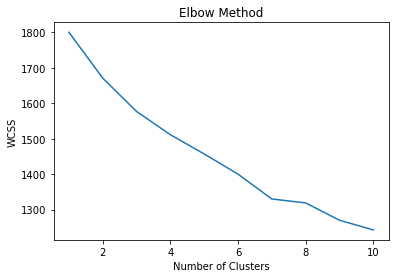

         Networking  Reputation_of_school  Changing_company  \
Cluster                                                       
0          2.062500              3.187500          2.812500   
1          3.538462              2.153846          2.076923   
2          2.750000              1.625000          3.187500   
3          3.450000              4.300000          3.950000   
4          2.416667              2.583333          1.750000   
5          2.000000              4.333333          2.500000   
6          4.294118              2.647059          3.647059   

         Academic_knowledge  Cost_driven  Location  Ranking_of_program  \
Cluster                                                                  
0                  2.437500     3.937500  1.875000            2.062500   
1                  2.307692     2.846154  3.153846            3.230769   
2                  3.375000     2.687500  2.000000            4.062500   
3                  4.450000     3.200000  3.500000            

In [86]:




# Choosing the right number of segments using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choosing optimal clusters (e.g., from elbow point, k=7 here as an example)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Adding cluster labels to the original dataset
dfSegmented['Cluster'] = clusters

# Interpretation of clusters
cluster_summary = dfSegmented.groupby('Cluster').mean()
print(cluster_summary)

# Evaluating with silhouette score
sil_score = silhouette_score(df_normalized, clusters)
print(f'Silhouette Score: {sil_score}')

In [95]:
cluster_count = dfSegmented['Cluster'].value

         Networking
Cluster            
0                16
1                13
2                16
3                20
4                12
5                 6
6                17


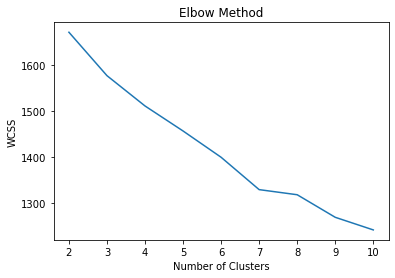

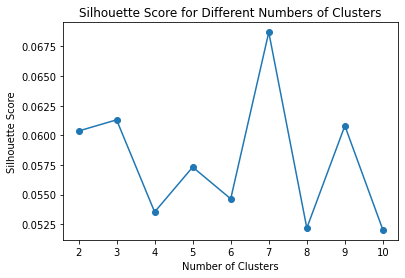

In [88]:
# Choosing the right number of segments using the Elbow Method
wcss = []

# Assuming df_normalized is the normalized data used for clustering
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized)
    cluster_labels = kmeans.fit_predict(df_normalized)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(df_normalized, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()



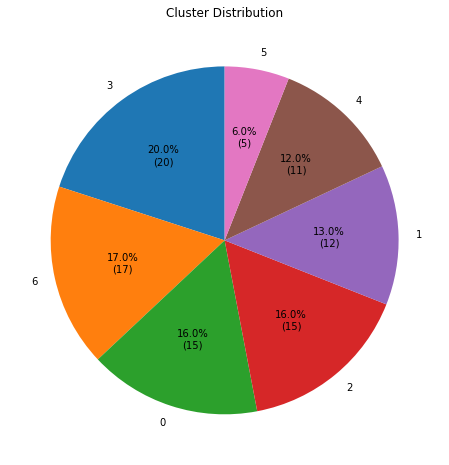

In [97]:
cluster_counts = dfSegmented['Cluster'].value_counts()

def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(pct * total / 100)
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=autopct_format(cluster_counts), startangle=90)
plt.title("Cluster Distribution")
plt.show()

In [89]:
# Choosing optimal clusters (e.g., from elbow point, k=4 here as an example)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Adding cluster labels to the original dataset
df['Cluster'] = clusters

# Interpretation of clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Evaluating with silhouette score
sil_score = silhouette_score(df_normalized, clusters)
print(f'Silhouette Score: {sil_score}')

         Networking  Reputation_of_school  Changing_company  \
Cluster                                                       
0          2.062500              3.187500          2.812500   
1          3.538462              2.153846          2.076923   
2          2.750000              1.625000          3.187500   
3          3.450000              4.300000          3.950000   
4          2.416667              2.583333          1.750000   
5          2.000000              4.333333          2.500000   
6          4.294118              2.647059          3.647059   

         Academic_knowledge  Cost_driven  Location  Ranking_of_program  \
Cluster                                                                  
0                  2.437500     3.937500  1.875000            2.062500   
1                  2.307692     2.846154  3.153846            3.230769   
2                  3.375000     2.687500  2.000000            4.062500   
3                  4.450000     3.200000  3.500000            

In [90]:
cluster_summaryTras=cluster_summary.T.round(2)
cluster_summaryTras


Cluster,0,1,2,3,4,5,6
Networking,2.06,3.54,2.75,3.45,2.42,2.00,4.29
Reputation_of_school,3.19,2.15,1.62,4.30,2.58,4.33,2.65
Changing_company,2.81,2.08,3.19,3.95,1.75,2.50,3.65
Academic_knowledge,2.44,2.31,3.38,4.45,2.25,3.50,2.18
Cost_driven,3.94,2.85,2.69,3.20,2.92,3.00,2.76
Location,1.88,3.15,2.00,3.50,4.42,4.50,2.18
Ranking_of_program,2.06,3.23,4.06,3.40,3.17,4.00,3.71
Increasing_salary,2.81,2.54,3.38,2.90,1.50,4.33,3.94
Launching_own_company,3.38,3.46,1.44,2.50,2.67,4.00,3.12
Personal_development,2.44,3.69,2.69,3.30,3.50,3.00,3.18


In [91]:
for columna in cluster_summaryTras.columns:
    print('cluster '+str(columna))
    print(cluster_summaryTras[columna][cluster_summaryTras[columna] > 3.7])
    print('---------------------------------------------')

cluster 0
Cost_driven           3.94
Broadening_horizon    3.88
Name: 0, dtype: float64
---------------------------------------------
cluster 1
Obtaining_promotion            4.08
Improving_leadership_skills    4.31
Name: 1, dtype: float64
---------------------------------------------
cluster 2
Ranking_of_program           4.06
Changing_career              3.88
International_perspective    4.50
Name: 2, dtype: float64
---------------------------------------------
cluster 3
Reputation_of_school    4.30
Changing_company        3.95
Academic_knowledge      4.45
Name: 3, dtype: float64
---------------------------------------------
cluster 4
Location                 4.42
Benchmarking_yourself    4.00
Name: 4, dtype: float64
---------------------------------------------
cluster 5
Reputation_of_school           4.33
Location                       4.50
Ranking_of_program             4.00
Increasing_salary              4.33
Launching_own_company          4.00
International_perspective      4.50

In [92]:
for columna in cluster_summaryTras.columns:
    print('cluster '+str(columna))
    print(cluster_summaryTras[columna].sort_values(ascending=False))
    print('---------------------------------------------')

cluster 0
Cost_driven                    3.94
Broadening_horizon             3.88
Obtaining_promotion            3.62
Getting_out_of_office          3.56
Launching_own_company          3.38
Reputation_of_school           3.19
International_perspective      3.00
Changing_company               2.81
Increasing_salary              2.81
Improving_English              2.50
Benchmarking_yourself          2.50
Personal_development           2.44
Academic_knowledge             2.44
Improving_leadership_skills    2.38
Changing_career                2.31
Ranking_of_program             2.06
Networking                     2.06
Location                       1.88
Name: 0, dtype: float64
---------------------------------------------
cluster 1
Improving_leadership_skills    4.31
Obtaining_promotion            4.08
Personal_development           3.69
Networking                     3.54
Launching_own_company          3.46
Ranking_of_program             3.23
Location                       3.15
Cost_drive

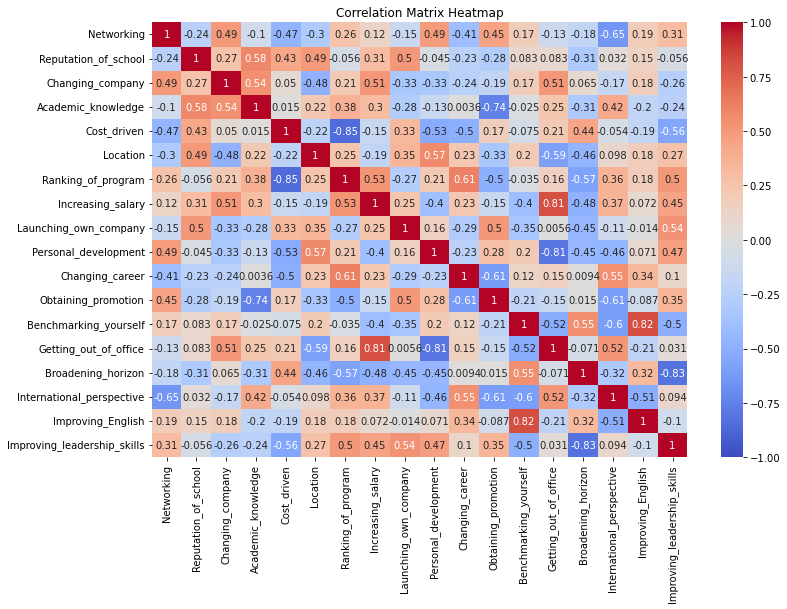

In [93]:
correlation_matrix = cluster_summary.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

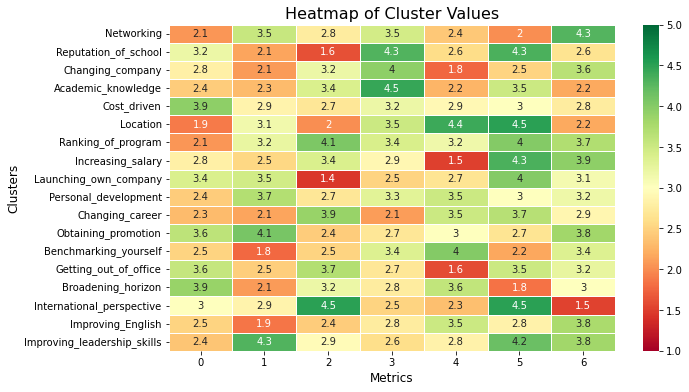

In [102]:
# Set the index to the first column (Labels)
#cluster_summaryTras.set_index('Cluster', inplace=True)'

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summaryTras, annot=True, cmap='RdYlGn', vmin=1, vmax=5, center=3, linewidths=0.5)

# Customize the title and labels
plt.title('Heatmap of Cluster Values', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Clusters', fontsize=12)

# Show the plot
plt.show()

In [100]:
cluster_summaryTras.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Cluster')